In [1]:
import numpy as np
import torch

import sys, os

sys.path.append("../")

from vi_rnn.saving import load_model
import matplotlib.pyplot as plt

%matplotlib inline

# We used openly accessible electroencephalogram (EEG) data from Schalk et al. 2004
# available from https://www.physionet.org/content/eegmmidb/1.0.0/ (Moody et al. 2000; ODC-BY licence).
# This repo includes preprocessed data from session S001R01.

In [2]:
# Load model
name = "EEG_Inv_Obs_LRRNN_Z_Date_32024_07_29_T_17_43_46"
vae, params, task_params, training_params = load_model(
    "../models/sweep_eeg_rs/" + name, load_encoder=False
)
# Load data
raw_dat = np.load("../data/eeg/EEG_data_zscored.npy")
smooth_dat = np.load("../data/eeg/EEG_data_smoothed.npy")

using clipped ReLU activation
using uniform init
key transition.hz not found in rnn, deleted


In [3]:
from evaluation.pse import power_spectrum_helling as pse
from evaluation.kl_Gauss import calc_kl_from_data

In [4]:
# Generate data

t1 = 1200
with torch.no_grad():
    z0 = vae.rnn.inv_observation(
        torch.from_numpy(raw_dat[t1]).reshape(1, 64, 1).float()
    )
    Z = vae.rnn.get_latent_time_series(time_steps=800, cut_off=0, noise_scale=1)
    data_gen = vae.rnn.get_observation(Z, noise_scale=1)

no input


In [5]:
# channel names (extracted from the Physionet data using MNE (https://mne.tools/stable/index.htmlZ))

channels = [
    "Fc5.",
    "Fc3.",
    "Fc1.",
    "Fcz.",
    "Fc2.",
    "Fc4.",
    "Fc6.",
    "C5..",
    "C3..",
    "C1..",
    "Cz..",
    "C2..",
    "C4..",
    "C6..",
    "Cp5.",
    "Cp3.",
    "Cp1.",
    "Cpz.",
    "Cp2.",
    "Cp4.",
    "Cp6.",
    "Fp1.",
    "Fpz.",
    "Fp2.",
    "Af7.",
    "Af3.",
    "Afz.",
    "Af4.",
    "Af8.",
    "F7..",
    "F5..",
    "F3..",
    "F1..",
    "Fz..",
    "F2..",
    "F4..",
    "F6..",
    "F8..",
    "Ft7.",
    "Ft8.",
    "T7..",
    "T8..",
    "T9..",
    "T10.",
    "Tp7.",
    "Tp8.",
    "P7..",
    "P5..",
    "P3..",
    "P1..",
    "Pz..",
    "P2..",
    "P4..",
    "P6..",
    "P8..",
    "Po7.",
    "Po3.",
    "Poz.",
    "Po4.",
    "Po8.",
    "O1..",
    "Oz..",
    "O2..",
    "Iz..",
]

/tmp/ipykernel_2467362/2313388169.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4409.)
  axs[1].plot(data_gen[0, ch_n, :, 0].T + i * 4, lw=1, color="slategrey")


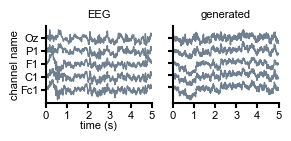

In [6]:
plt_chs = [2, 9, 32, 49, 61]
fig, axs = plt.subplots(1, 2, figsize=(3, 1))
for i, ch_n in enumerate(plt_chs):
    axs[1].plot(data_gen[0, ch_n, :, 0].T + i * 4, lw=1, color="slategrey")

t1 = 1500
for i, ch_n in enumerate(plt_chs):
    axs[0].plot(raw_dat[t1 : 800 + t1, ch_n].T + i * 4, lw=1, color="slategrey")

axs[0].set_xlim(0, 800)
axs[1].set_xlim(0, 800)
axs[0].set_yticks(range(0, 20, 4))
axs[1].set_yticks(range(0, 20, 4))
axs[0].set_yticklabels([channels[ch_n].strip(".") for ch_n in plt_chs])
axs[1].set_yticklabels([])
axs[0].set_xticks(np.arange(0, 160 * 5 + 1, 160))
axs[0].set_xticklabels(np.arange(0, 1 * 5 + 1, 1))
axs[1].set_yticklabels([])
axs[1].set_xticks(np.arange(0, 160 * 5 + 1, 160))
axs[1].set_xticklabels(np.arange(0, 1 * 5 + 1, 1))
axs[0].set_xlabel("time (s)")
axs[0].set_title("EEG")
axs[1].set_title("generated")
axs[0].set_ylabel("channel name")

plt.savefig("../figures/fig_EEG.pdf", bbox_inches="tight")

In [7]:
# Generate more data

t1 = 1200
with torch.no_grad():
    z0 = vae.rnn.inv_observation(
        torch.from_numpy(raw_dat[t1]).reshape(1, 64, 1).float()
    )
    Z = vae.rnn.get_latent_time_series(time_steps=9600, cut_off=0, noise_scale=1)
    data_gen = vae.rnn.get_observation(Z, noise_scale=1)

no input


Text(0.5, 1.0, 'EEG')

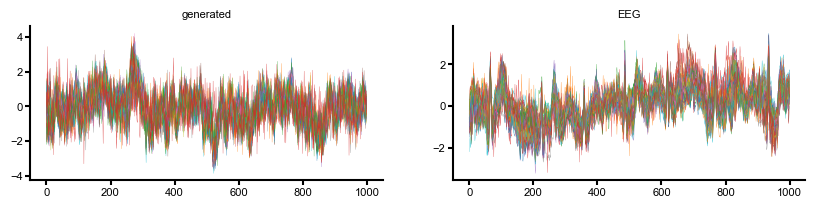

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2))

t = 1000
ax[0].plot(data_gen[0, :, :t, 0].T, lw=0.2, alpha=1)
ax[1].plot(raw_dat[:t], lw=0.2, alpha=1)
ax[0].set_title("generated")
ax[1].set_title("EEG")

Text(0.5, 1.0, 'EEG')

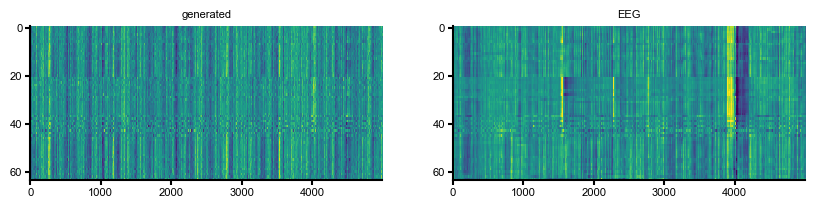

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 2))
vlim = 4
t = 5000
ax[0].imshow(
    data_gen[0, :, :t, 0], aspect="auto", cmap="viridis", vmin=-vlim, vmax=vlim
)
ax[1].imshow(raw_dat.T[:, :t], cmap="viridis", aspect="auto", vmin=-vlim, vmax=vlim)
ax[0].set_title("generated")
ax[1].set_title("EEG")